# Objective

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

# Loading of dataset

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import re

import nltk
import string
import warnings
warnings.filterwarnings('ignore')

In [69]:
tweets=pd.read_csv(r'C:\Users\ssharma601\Downloads\1580822268_1570782960_proj2\TwitterHate.csv')
tweets.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [70]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [71]:
tweets.shape

(31962, 3)

In [72]:
tweets.label.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

# Cleaning Up

In [73]:
def remove(input_text,pattern):
    r=re.findall(pattern,input_text)
    for word in r:
        input_text = re.sub(word,"",input_text)
    return input_text

In [74]:
tweets['clean_tweet']= np.vectorize(remove)(tweets0, "@\w+")   #removing user handles @
tweets['clean_tweet']= np.vectorize(remove)(tweets0,"\w+://\S+")  #Removing URLs
#tweets['clean_tweet']= np.vectorize(remove)(tweets0,"#")  #remove # tags
tweets.head(5)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [75]:
tweets['clean_tweet']= tweets['clean_tweet'].str.replace("[^a-zA-Z#]"," ")  #removing special characters, numbers and punctuations
tweets.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [76]:
tweets['clean_tweet']=tweets['clean_tweet'].apply(lambda x: " ".join([word for word in x.split() if len(word)>3]))
tweets.head()
#where x is anytext

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [77]:
tweet_token=tweets['clean_tweet'].apply(lambda x:x.split())
tweet_token.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [78]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer= PorterStemmer()
tweet_token=tweet_token.apply(lambda sent: [stemmer.stem(word) for word in sent])

In [79]:
tweet_token.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [80]:
#combining words into single sent
for i in range(len(tweet_token)):
    tweet_token[i]= " ".join(tweet_token[i])
    
tweets['clean_tweet']=tweet_token
tweets.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# EDA

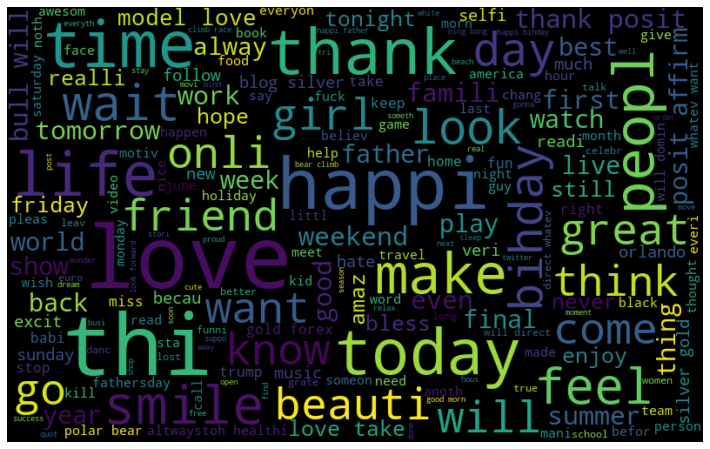

In [81]:
#visualizing the common words
words=" ".join([sentence for sentence in tweets['clean_tweet']])
from wordcloud import WordCloud
wordcloud= WordCloud(width=800,height=500,random_state=40,max_font_size=100).generate(words)

#plotting graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

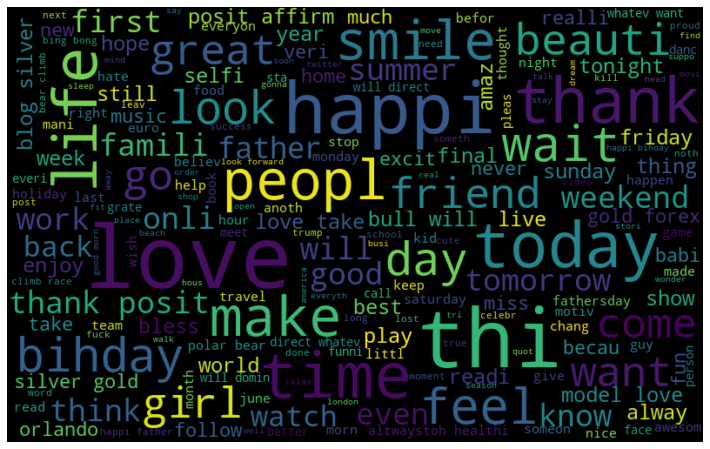

In [82]:
#frequent word used as positive sentiment
words=" ".join([sentence for sentence in tweets['clean_tweet'][tweets['label']==0]])

wordcloud= WordCloud(width=800,height=500,random_state=40,max_font_size=100).generate(words)

#plotting graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

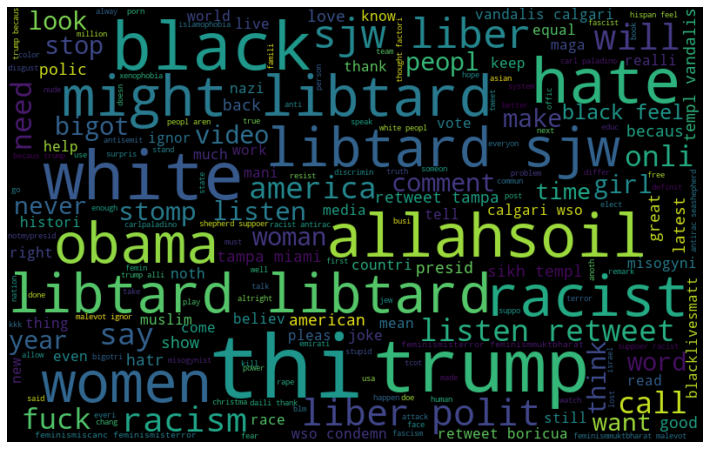

In [83]:
#frequent word used as negative sentiment
words=" ".join([sentence for sentence in tweets['clean_tweet'][tweets['label']==1]])

wordcloud= WordCloud(width=800,height=500,random_state=40,max_font_size=100).generate(words)

#plotting graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
def hashtag(tweets):
    hashtag=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtag.append(ht)
    return hashtag

In [89]:
#extracting hashtags from non racist/sexist twwets
ht_pos=hashtag(tweets['clean_tweet'][tweets['label']==0])

#extracting hashtags from racist/sexist tweets
ht_neg=hashtag(tweets['clean_tweet'][tweets['label']==1])

In [91]:
ht_pos[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [92]:
ht_neg[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [93]:
#unnest list
ht_pos= sum(ht_pos , [])
ht_neg= sum(ht_neg , [])

In [94]:
ht_pos[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [97]:
freq= nltk.FreqDist(ht_pos)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
               'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


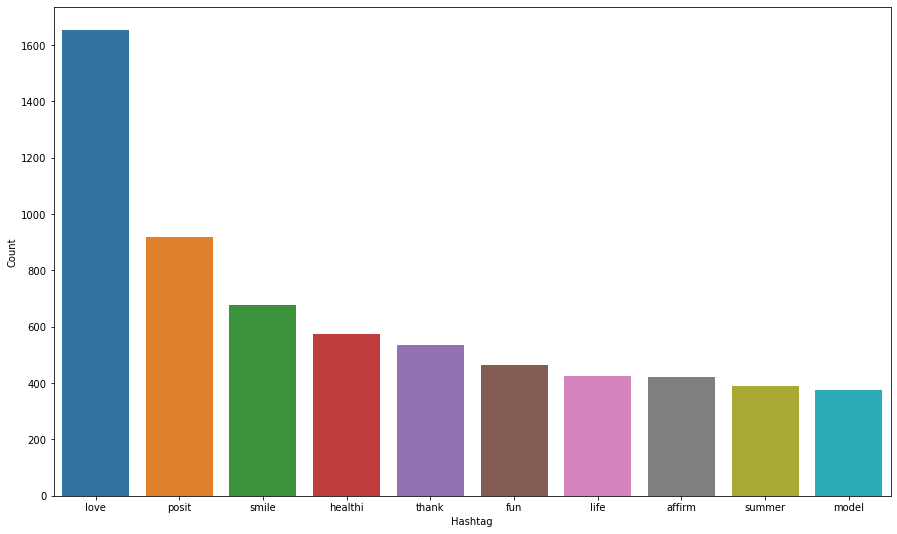

In [98]:
#selecting top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [99]:
freq= nltk.FreqDist(ht_neg)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
               'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


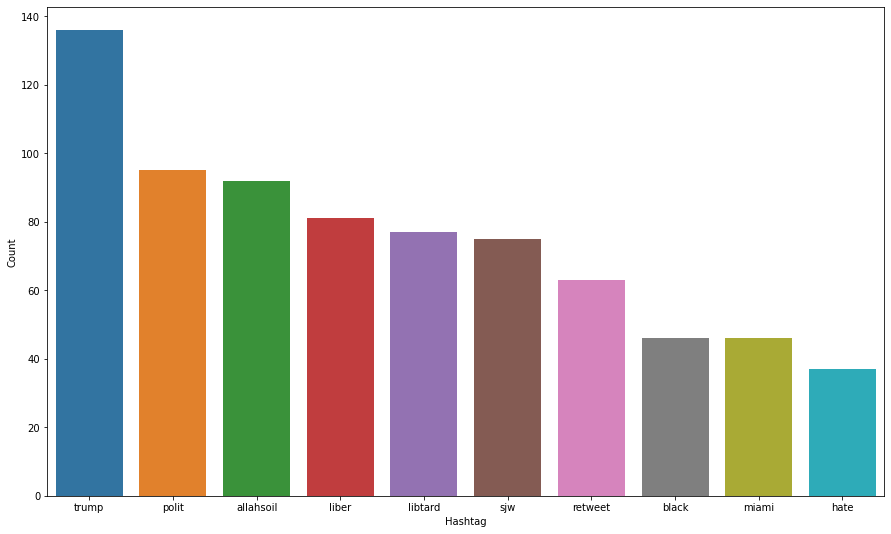

In [100]:
#selecting top 10 hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vector=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vector.fit_transform(tweets['clean_tweet'])
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 124819 stored elements in Compressed Sparse Row format>

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, tweets['label'], test_size=0.25, random_state=42)

# Model building 

In [123]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
#training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [107]:
#testing
pred= logreg.predict(X_test)
f1_score(y_test,pred)    #it will balance the positive and negarive read

0.49763033175355453

In [110]:
accuracy_score(y_test, pred)

0.9469403078463271

In [118]:
#Create a document term matrix using count vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.90,min_df=2,max_features = 5000,stop_words='english')
bow2=vectorizer.fit_transform(tweets['clean_tweet'])
bow2

<31962x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 167473 stored elements in Compressed Sparse Row format>

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, tweets['label'], test_size=0.25, random_state=42)

In [120]:
#Logistic Regression

logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
pred= logreg1.predict(X_test)
print(f1_score(y_test,pred))
print(accuracy_score(y_test, pred))

0.49763033175355453
0.9469403078463271


Hence concluded that either you use tfidf or count vectorizer the f1 score and accuracy are coming same from both


In [126]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.74      0.38      0.50       559

    accuracy                           0.95      7991
   macro avg       0.85      0.68      0.73      7991
weighted avg       0.94      0.95      0.94      7991



In [127]:
# Adjusting class imbalance

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [129]:
pred= logreg.predict(X_test)
print(f1_score(y_test,pred))
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.4201520912547528
0.8473282442748091
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7432
           1       0.29      0.79      0.42       559

    accuracy                           0.85      7991
   macro avg       0.63      0.82      0.67      7991
weighted avg       0.93      0.85      0.88      7991



In [139]:
!pip install --upgrade xgboost

  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.2.1
    Uninstalling xgboost-1.2.1:
      Successfully uninstalled xgboost-1.2.1


In [155]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

[17:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [156]:
# evaluate predictions
accuracy_score(y_test, y_pred)

0.9481917156801402

In [157]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.49140049140049136
0.9481917156801402
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.78      0.36      0.49       559

    accuracy                           0.95      7991
   macro avg       0.87      0.68      0.73      7991
weighted avg       0.94      0.95      0.94      7991

